### Определение колицества кластеров методами Локтя и Силуэта

#### Метод локтя (инерции)

In [2]:
# импорт бибилиотек
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # библиотека для кластеризации
import matplotlib.pyplot as plt

In [3]:
# load data
df = pd.read_csv('data/pokemon.csv')
df.head()


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [4]:
# Функция, которая принимает количество кластеров дл k-means и матрицу с признаками объектов, и возвращает инерцию
def get_inertia (cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42) # инициализируем алгоритм кластеризации
    k_means.fit(X) # запускаем алгоритм
    inertia = k_means.inertia_ # находим значение инерции
    
    # возвращаем значение инерции из функции
    return inertia

In [5]:
# произведем кластеризацию покемонов по уровню атаки и защиты
X = df[['Attack', 'Defense']]

# создаем пустой список для значений инерции
inertia = []

# интерируемся по каличеству кластеров (от 1 до 9)  сохраняем значения инерции для каждого значения кол-ва кластеров
for cluster_num in range(1, 10):
    # добавляем значения инерции в список
    inertia.append(get_inertia(cluster_num, X))

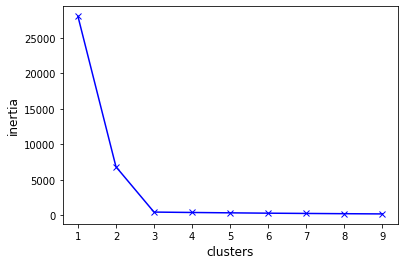

In [6]:
# визуализируем значение 
plt.xlabel('clusters', fontsize=12) # ось количества кластеров
plt.ylabel('inertia', fontsize=12) # ось со знвчениями инерции для каждого количества кластеров

# рисуем диаграмму
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

# изгиб локтя на количестве трёх кластеров

#### Метод силуэта

In [7]:
# Импорт метрики силуэта
from sklearn.metrics import silhouette_score

In [8]:
# Функция для подсчета метрики методом силуэта
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42) # инициализируем алгоритм кластеризации
    k_means.fit(X) # запускаем алгоритм
    
    # считаем метрику силуэта, передав данные и результат кластеризации данных (т.е. к каким кластер относятся объекты)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette # возвращаем значение функции

<Axes: xlabel='cluster', ylabel='silhouette'>

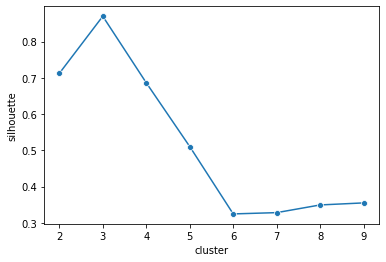

In [9]:
# Создаем словарь с ключами инерции и количества кластеров, значения будут списки
silhouette_res = {'silhouette': [], 'cluster': []}

# выберем нужные признаки: атака и защита
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10): # итерируем количество кластеров от 2 до 10
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X)) # в словарь по ключу добавляем в список занчение функции
    silhouette_res['cluster'].append(cluster_num) # в словарь по ключу добавляем в список значение функции
    
silhouette_df = pd.DataFrame(silhouette_res) # словарь со значениями функции преобразуем в дата-фрейм

# визуализируем метрику силуэт
sns.lineplot(data=silhouette_res, x='cluster', y='silhouette', marker='o')

# пик диаграммы на точке 3

##### Задание 2.7 Кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров

Пик диаграммы на значении 3


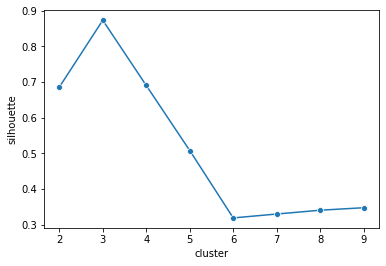

In [10]:
df = pd.read_csv('data/values_from_the_instrument.csv')

# Создаем словарь с ключами инерции и количества кластеров, значения будут списки
silhouette_res = {'silhouette': [], 'cluster': []}

for cluster_num in range(2, 10): # итерируем количество кластеров от 2 до 10
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, df)) # в словарь по ключу добавляем в список занчение функции
    silhouette_res['cluster'].append(cluster_num) # в словарь по ключу добавляем в список занчение функции
    
silhouette_df = pd.DataFrame(silhouette_res) # словарь со значениями функции преобразуем в дата-фрейм

# визуализируем метрику силуэт
sns.lineplot(data=silhouette_res, x='cluster', y='silhouette', marker='o')

print('Пик диаграммы на значении 3')